In [4]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np
import imutils
import easyocr 

ModuleNotFoundError: No module named 'easyocr'

  Using cached easyocr-1.4.2-py3-none-any.whl (70.8 MB)


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 171, in _merge_into_criterion
    crit = self.state.criteria[name]
KeyError: 'torch'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "C:\ProgramData\Anaconda3\lib\so

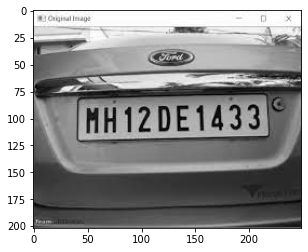

In [16]:
img=cv2.imread('plaque6.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))


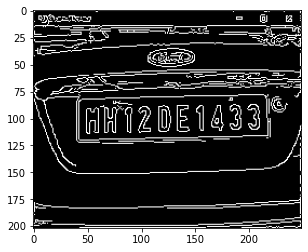

In [17]:
bfilter=cv2.bilateralFilter(gray,11,17,17)
edged=cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


In [18]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours, key=cv2.contourArea, reverse=True)[:10]


In [19]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx)==4:
    location=approx
    break


In [20]:
location

array([[[216,  82]],

       [[216, 116]],

       [[ 42, 119]],

       [[ 45,  82]]], dtype=int32)

In [21]:
mask=np.zeros(gray.shape, np.uint8)
new_image=cv2.drawContours(mask, [location], 0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)

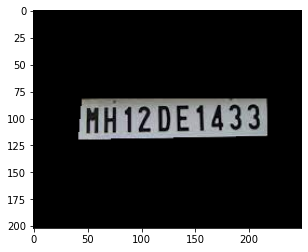

In [22]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [23]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
croped_image=gray[x1:x2+1,y1:y2+1]


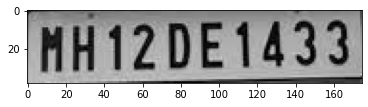

In [24]:
plt.imshow(cv2.cvtColor(croped_image, cv2.COLOR_BGR2RGB))

In [15]:
reader=easyocr.Reader(['en'])
result=reader.readtext(croped_image)

NameError: name 'easyocr' is not defined

In [ ]:
result

In [ ]:
text=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res=cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res=cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))